## Data Pre-processing for Scikit Learn

- Dealing with Outliers 
- Dealing with Missing Values
- Handling Categorical Data
- Scaling Data
- Handling Imbalance
- text preprocessing

#### Outlier detection

- Outliers are data that differ significantly from other data in a sample.
- Outliers skew your data distributions and impact your basic statistical measures and can be responsible for underperformance of certain algorithms.
- Some ML algorithms are relatively robust to outliers. Other ML algorithms (such as multiple linear regression) are much more sensitive to outliers. 

- Note:
    - If it is apparent that outliers may occur due to errors in data collection/input or corrupted data then it is reasonable to remove such outliers. 
    - However, in some cases the outliers may be representative of a particular scenario. If you are removing the outliers then your model can no longer account for these instances. 
    - If it can be determined that an outlier is in fact erroneous, then it should be deleted from the dataset (or alternatively clamped or corrected if possible). 



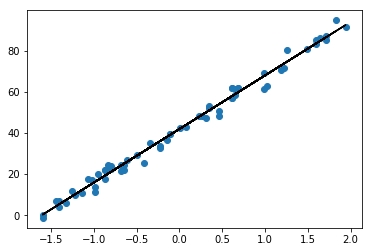

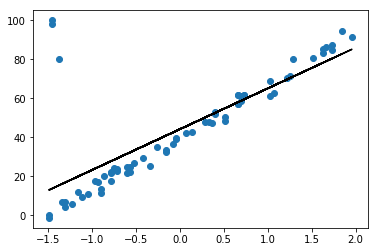

- Visualization for Outliers:  create boxplots either through Seaborn or Pandas to help visualize outliers

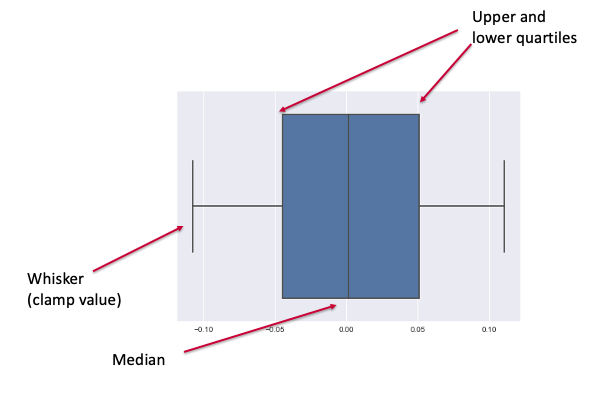

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

sns.boxplot( x=df["sepal_length"] );
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

diab = datasets.load_diabetes()
X = diab.data
y = diab.target

sns.boxplot(x=X[:, 3])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

diab = datasets.load_diabetes()
X = diab.data
y = diab.target

sns.boxplot(x=X[:, 5])
plt.show()

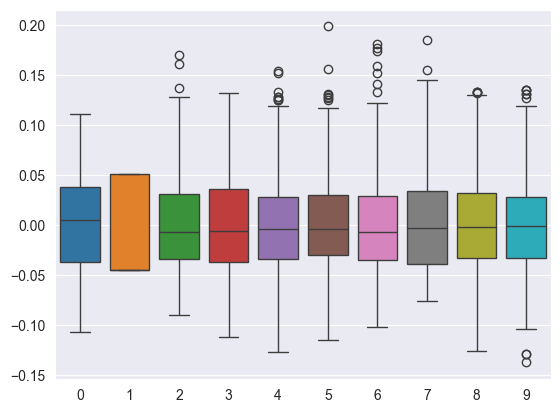

In [5]:
#plot all features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

diab = datasets.load_diabetes()
X = diab.data
y = diab.target

sns.boxplot(data= pd.DataFrame(X))
plt.show()

#### Dealing with Missing Values
- Missing values: could be an error in the data collection process, certain fields may have been left blank in a survey, power outage, etc. 
- A simple way of dealing with this is by replacing the non-standard missing values with NaN. 
- Then use df.isnull().sum() will only identify the missing values that are specified as NaN.

In [ ]:
#Notice the .sum() method will count the number of missing values in each column
import pandas as pd
import numpy as np

seriesA = pd.Series(np.random.rand(3), index=['a', 'b', 'c'])
seriesB = pd.Series(np.random.rand(4), index=['a', 'b', 'c', 'd'])
seriesC = pd.Series(np.random.rand(3), index=['b', 'c', 'd'])

df = pd.DataFrame({'one' : seriesA,
                   'two' : seriesB,
                    'three' : seriesC})
print (df)
print (df.isnull().sum())

In [6]:
import pandas as pd
import numpy as np

seriesA = pd.Series([12, 4, 3, '?'], index=['a', 'b', 'c', 'd'])
seriesB = pd.Series([12, 4, 3, '?'], index=['a', 'b', 'c', 'd'])
seriesC = pd.Series([8, 1, '?', 43], index=['a', 'b', 'c', 'd'])

df = pd.DataFrame({'one' : seriesA,
                'two' : seriesB,
                'three' : seriesC})
    
print(df)
print(df.isnull().sum())

  one two three
a  12  12     8
b   4   4     1
c   3   3     ?
d   ?   ?    43
one      0
two      0
three    0
dtype: int64


In [8]:
#replace ? with NaN

import pandas as pd
import numpy as np

seriesA = pd.Series([12, 4, 3, '?'], index=['a', 'b', 'c', 'd'])
seriesB = pd.Series([12, 4, 3, '?'], index=['a', 'b', 'c', 'd'])
seriesC = pd.Series([8, 1, '?', 43], index=['a', 'b', 'c', 'd'])

df = pd.DataFrame({'one' : seriesA,
                    'two' : seriesB,
                   'three' : seriesC})
    
df = df.replace('?', np.nan)

print (df)
print (df.isnull().sum())



    one   two  three
a  12.0  12.0    8.0
b   4.0   4.0    1.0
c   3.0   3.0    NaN
d   NaN   NaN   43.0
one      1
two      1
three    1
dtype: int64


C:\Users\AlanRosston\AppData\Local\Temp\ipykernel_27224\217247620.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


In [10]:
#use replace to replace any occurrence of ‘?’ with NaN within one column of our dataframe (in this case column ‘one’).
import pandas as pd
import numpy as np

seriesA = pd.Series([12, 4, 3, '?'], index=['a', 'b', 'c', 'd'])
seriesB = pd.Series([12, 4, 3, '?'], index=['a', 'b', 'c', 'd'])
seriesC = pd.Series([8, 1, '?', 43], index=['a', 'b', 'c', 'd'])

df = pd.DataFrame({'one' : seriesA,
           	           'two' : seriesB,
			'three' : seriesC})
    
df['one'] = df['one'].replace('?',np.nan)

print (df)
print (df.isnull().sum())

    one two three
a  12.0  12     8
b   4.0   4     1
c   3.0   3     ?
d   NaN   ?    43
one      1
two      0
three    0
dtype: int64


C:\Users\AlanRosston\AppData\Local\Temp\ipykernel_27224\549257691.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['one'] = df['one'].replace('?',np.nan)


In [11]:
#drop any rows from our dataframe that contain a missing value
import pandas as pd
import numpy as np

seriesA = pd.Series(np.random.rand(3), index=['a', 'b', 'c'])
seriesB = pd.Series(np.random.rand(4), index=['a', 'b', 'c', 'd'])
seriesC = pd.Series(np.random.rand(3), index=['b', 'c', 'd'])

df = pd.DataFrame({'one' : seriesA,
           	           'two' : seriesB,
			'three' : seriesC})

print (df)
newdf = df.dropna()
print (newdf)

        one       two     three
a  0.659471  0.174033       NaN
b  0.906197  0.481537  0.752299
c  0.353741  0.213121  0.367788
d       NaN  0.514106  0.295257
        one       two     three
b  0.906197  0.481537  0.752299
c  0.353741  0.213121  0.367788


In [12]:
#Use the threshold value of 4. There, a column must have four or more non-NA values in order to be retained. 
import pandas as pd
import numpy as np

seriesA = pd.Series(np.random.rand(3))
seriesB = pd.Series(np.random.rand(4))
seriesC = pd.Series(np.random.rand(5))
seriesD = pd.Series(np.random.rand(7))

df = pd.DataFrame({'one' : seriesA,
           	           'two' : seriesB,
			'three' : seriesC,
            		'four' : seriesD})
print (df)
df = df.dropna(thresh=4, axis=1 )
print (df)

        one       two     three      four
0  0.987045  0.288294  0.884922  0.170891
1  0.549502  0.008267  0.469838  0.127901
2  0.527940  0.249972  0.647251  0.403448
3       NaN  0.836452  0.518302  0.365208
4       NaN       NaN  0.294691  0.759323
5       NaN       NaN       NaN  0.205364
6       NaN       NaN       NaN  0.244090
        two     three      four
0  0.288294  0.884922  0.170891
1  0.008267  0.469838  0.127901
2  0.249972  0.647251  0.403448
3  0.836452  0.518302  0.365208
4       NaN  0.294691  0.759323
5       NaN       NaN  0.205364
6       NaN       NaN  0.244090


#### Handling Categorical Data 

- When dealing with categorical data, it is important to distinguish between nominal and ordinal values. 

- Ordinal values are variables that have a logical ordering. For example, a letter grade for a student, ‘A’, ‘B’, ‘C’, …

- In contrast nominal features have no inherent ordering. For example, a features that report’s the colour of a car ‘Red’, ‘Blue’, etc.

- In the example below we have two categorical features. Department being a nominal feature and Grade being an ordinal feature
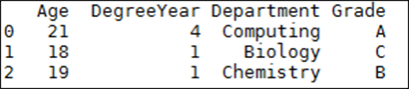


- For Ordinal Variables, need to convert the categorical string values into integers. This involves creating a dictionary to specify the direct mapping and using a dataframe method call map. 

- For nominal values we could directly encode them into integer values using the OrdinalEncoder from Scikitlearn. After the transform operation the LabelEncoder will return an array of numerical values. 



In [13]:
import pandas as pd
import numpy as np

seriesA = pd.Series(['A', 'C', 'B'])
seriesB = pd.Series([21, 18, 19])
seriesC = pd.Series([4, 1, 1])
seriesD = pd.Series(['Computing', 'Biology', 'Biology'])

df = pd.DataFrame({'Grade' : seriesA,  'Age' : seriesB, 'DegreeYear' : seriesC,
               'Department' : seriesD})
print (df)

  Grade  Age  DegreeYear Department
0     A   21           4  Computing
1     C   18           1    Biology
2     B   19           1    Biology


In [14]:
grade_mapping = {'F':0, 'D':1, 'C':2, 'B':3, 'A':4}

df['Grade'] = df['Grade'].map(grade_mapping)

print (df)

   Grade  Age  DegreeYear Department
0      4   21           4  Computing
1      2   18           1    Biology
2      3   19           1    Biology


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df["Department"] = enc.fit_transform(df[["Department"]])

print (df)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df[["Grade", "Department"]] = enc.fit_transform(df[["Grade", "Department"]])

print (df)

#### Scaling Data 
- The two most common data transformation techniques used are:
    - Normalising Data
    - Standardizing Data

In [15]:
#use MinMaxScaler()
import pandas as pd
from sklearn import preprocessing
import numpy as np

seriesA = pd.Series(np.random.rand(4)*100, index=['a', 'b', 'c', 'd'])
seriesB = pd.Series(np.random.rand(4)*100, index=['a', 'b', 'c', 'd'])
seriesC = pd.Series(np.random.rand(4)*100, index=['a', 'b', 'c', 'd'])

df = pd.DataFrame({'one' : seriesA, 'two' : seriesB, 'three' : seriesC})
print (df)

scalingObj = preprocessing.MinMaxScaler()
df[['one', 'two']]= scalingObj.fit_transform( df[['one', 'two']]  )
print (df)

         one        two      three
a  61.884620  68.904468  37.837787
b  62.654773  92.203615  17.941740
c  10.432489   8.302247  36.637095
d  21.900556  89.956609  60.438098
        one       two      three
a  0.985252  0.722303  37.837787
b  1.000000  1.000000  17.941740
c  0.000000  0.000000  36.637095
d  0.219601  0.973218  60.438098


In [16]:
# use StandardScaler()
import pandas as pd
import numpy as np
from sklearn import preprocessing

seriesA = pd.Series(np.random.rand(4)*100, index=['a', 'b', 'c', 'd'])
seriesB = pd.Series(np.random.rand(4)*100, index=['a', 'b', 'c', 'd'])
seriesC = pd.Series(np.random.rand(4)*100, index=['a', 'b', 'c', 'd'])

df = pd.DataFrame({'one' : seriesA, 'two' : seriesB, 'three' : seriesC})
print (df)

scaler = preprocessing.StandardScaler()
df[['one', 'two']]= scaler.fit_transform( df[['one', 'two']]  )
print (df)

         one        two      three
a  15.539136  95.632169  83.250847
b  51.648385  40.968392  42.499546
c   0.866189  81.771040  20.241933
d  65.440603  84.467127  90.821303
        one       two      three
a -0.681785  0.961504  83.250847
b  0.698619 -1.676692  42.499546
c -1.242710  0.292535  20.241933
d  1.225876  0.422654  90.821303


#### Handling Imbalance

- There are a range of strategies that attempt to address the issue of imbalance. The most common techniques focus on sampling as a means of addressing the disparity. 

- Common approaches include:
    - Random Undersampling
    - Random Oversampling
    - SMOTE
    - Tomek Links
- Imbalanced-learn is an excellent contribution package for Scikit-Learn and a collection of modern sampling techniques.

- Both random under-sampling and oversampling are basic techniques that attempt to rebalance the data. 
    - Random under-sampling will randomly remove data from the majority class until the two classes are balanced
    - (imblearn.under_sampling.RandomUnderSampler)

- Random over-sampling in contrast will gradually increase the size of the minority class  by randomly duplicating instances from the minority class. This is similar to observation weighting
    - (imblearn.over_sampling.RandomOverSampler). 

- use confusion metrix to assess the performance 

- Both random under-sampling and oversampling are basic techniques that attempt to rebalance the data. 
    - Random under-sampling will randomly remove data from the majority class until the two classes are balanced
    - (imblearn.under_sampling.RandomUnderSampler)

- Random over-sampling in contrast will gradually increase the size of the minority class  by randomly duplicating instances from the minority class. This is similar to observation weighting
    - (imblearn.over_sampling.RandomOverSampler). 

- use confusion metrix to assess the performance 

### Text Processing in Scikit-learn
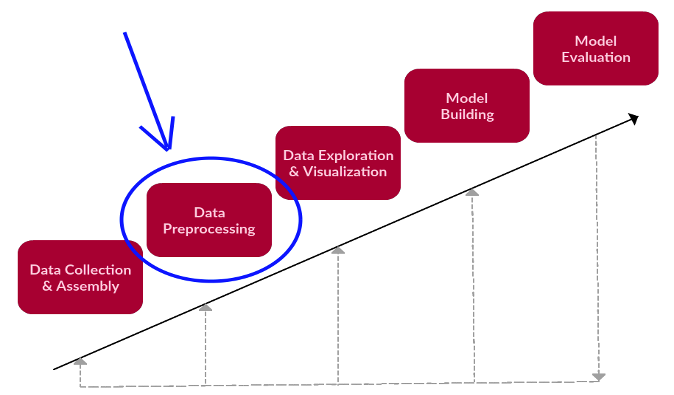

- in Sckit-learn:
    - Features and classes/target values are separate objects (data structures)
    - Features and classes should be numerical
    - Features and classes should be NumPy arrays
    - Features and classes should have a specific shape
- text shall be preprocessed and convert into numbers

#### Preparing text data

- Text data requires special preparation before you can start using it for predictive modeling.

- The text must be parsed to remove words, called tokenization. 

- Then the words need to be encoded as **integers or floating point values** for use as input to a machine learning algorithm, called **feature extraction** (or **vectorization**).

- This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or “Bag of n-grams” representation. 

- Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

- Two words are similar in meaning if their context vectors are similar

#### Bags of words

- Assign a fixed integer id to each **word occurring** in any document of the training set (for instance by building a dictionary from words to integer indices).
- For each document **#$i$**, count the number of occurrences of each word **w** and store it in **$X[i, j]$** as the value of feature **#$j$** where **$j$** is the index of word **w** in the dictionary.
- The bags of words representation implies that **n_features** is the number of distinct words in the corpus



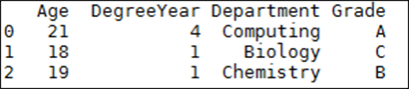

#### But raw occurrence is a bad representation
- Occurrence is clearly useful; if sugar appears a lot near apricot, that's useful information.
- But overly frequent words like the, it, or they are not very informative about the context
- Need a function that resolves this paradox!

#### TF-IDF

- **Term Frequencies (TF)**:  divide **the number of occurrences of each word** in a document by **the total number of words in the document**

- **Inverse Document Frequency (IDF)**: This downscales words that appear a lot across documents.

- TF-IDF value for word t in document d:  
    
    $W_{t,d}={tf}_{t,d}\times {idf}_t$

- tf-idf is a sparse represenation
    - long (20k  to 50K)
    - sparse (most elements are zero)
- dense models:
    - Word2vec (Mikolov et al.) https://code.google.com/archive/p/word2vec
    - Fasttext:  http://www.fasttext.cc/
    - Glove (Pennington, Socher, Manning): http://nlp.stanford.edu/projects/glove/